In [64]:
# Import statements and notebook settings
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import copy
import time
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

show_mnist_plots = True

In [34]:
# Importing and reshaping data

(train_data, train_label), (test_data, test_label) = mnist.load_data()

if show_mnist_plots:
    for i in range(4):
        plt.subplot(330 + 1 + i)
        plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))
        plt.show()

num_labels = 10

def one_hot(labels, num_labels):
    # return array of one-hot encoding to match number of labels
    return np.eye(num_labels)[np.array(labels).reshape(-1)]

def vectorize_data(data, label, num_labels):
    # flatten each image in data into 1D array and create one-hot encoding result matrix
    data_vector = data.reshape(data.shape[0], -1)
    label_vector = one_hot(label, num_labels)
    return data_vector, label_vector

train_A, train_B = vectorize_data(train_data, train_label, num_labels)
test_A, test_B = vectorize_data(test_data, test_label, num_labels)

iter 0: 258.3500483036041 sec
iter 1: 176.9270977973938 sec
iter 2: 91.33296966552734 sec
iter 3: 40.157275915145874 sec


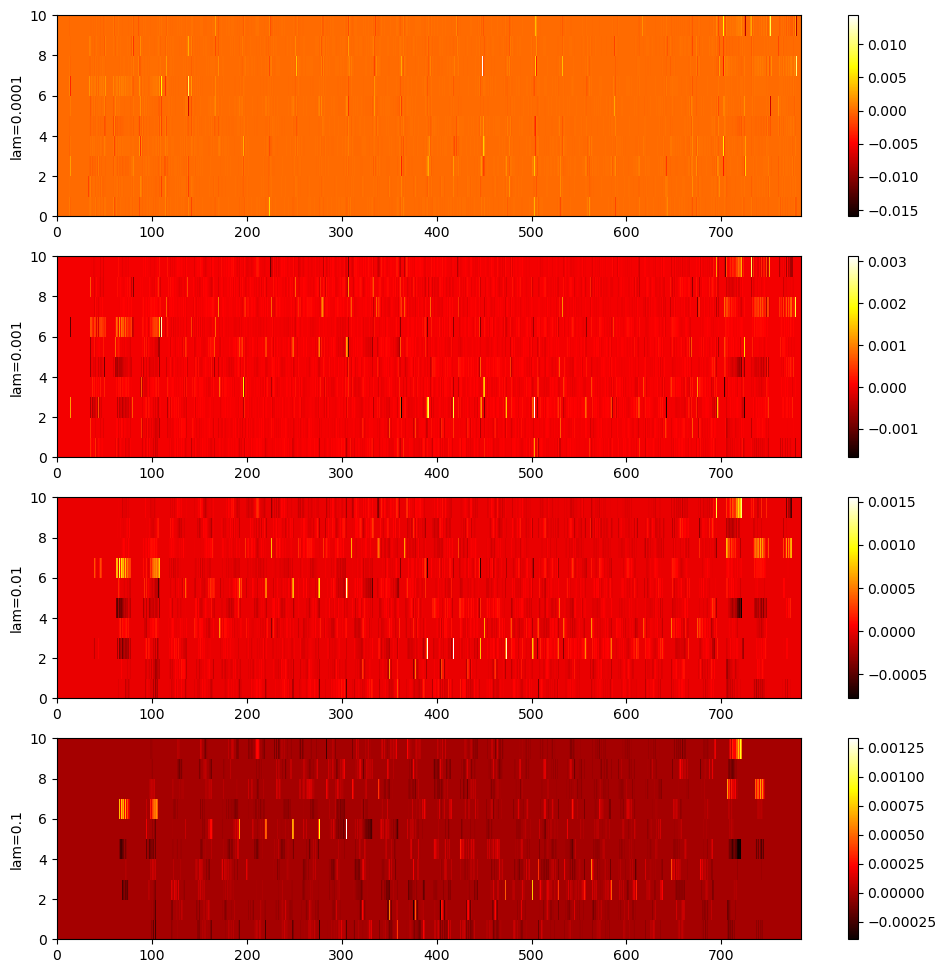

In [35]:
# solve AX=B to find pixels that map to correct label outcome
plt.rcParams['figure.figsize'] = [12, 12]

# lambda is regularization factor in Lasso algo
lam_array = np.array([1.5e-3, 1.7e-3, 1e-2, 2e-2, 5e-2, 7e-2])
lam_array = np.array([1e-4, 1e-3, 1e-2, 1e-1])

def generate_models(A, b, lambda_array):
    model_list = []
    for i, lam in enumerate(lambda_array):
        start = time.time()
        if lam==0:
            clf = linear_model.LinearRegression(fit_intercept=False)
        else:
            clf = linear_model.Lasso(alpha=lam, 
                                     fit_intercept=False, 
                                     warm_start=True, 
                                     selection='random',
                                    #  max_iter=200
                                     )
        clf.fit(A, b)
        elapsed = time.time() - start
        print(f"iter {i}: {elapsed} sec")
        model_list.append(clf)
    return model_list

clf_array = generate_models(train_A, train_B, lam_array)

fig,axs = plt.subplots(len(lam_array),1)
for j, lam in enumerate(lam_array):
    x = clf_array[j].coef_
    x_pcolor = axs[j].pcolor(x,cmap='hot')
    fig.colorbar(x_pcolor, ax=axs[j])
    axs[j].set_ylabel(f"lam={lam}") 

plt.show()

In [37]:
# # Test model and multiply it by first image

# for j in range(5):
#     print(f"value: {train_label[j]}")
#     for i, lam in enumerate(lam_array):
#         test_model = clf_array[i].coef_
#         image1 = train_A[j]
        
#         b1 = image1.T@test_model.T
#         b1[b1<0.1] = int(0)

#         max_loc = np.argmax(b1)
#         print(f"Value estimate: {max_loc}")

#         print(f"lam={lam}\tresult: {b1}\n")


# print number of iterations for each model
for count, model_ind in enumerate(clf_array):
    print(f"model: {count};\titerations: {model_ind.n_iter_}")
    print(f"\t\t\tfeatures: {model_ind.n_features_in_}")a

model: 0;	iterations: [843, 752, 766, 744, 768, 851, 761, 735, 779, 698]
			features: 784
model: 1;	iterations: [501, 601, 553, 564, 570, 564, 497, 499, 536, 538]
			features: 784
model: 2;	iterations: [369, 337, 356, 311, 341, 329, 352, 326, 440, 360]
			features: 784
model: 3;	iterations: [236, 231, 209, 191, 226, 195, 204, 181, 265, 230]
			features: 784


In [13]:
# test_matrix = test_A[0:5]
# print(test_matrix)
# print("*********")
# for col in test_matrix:
#     print(col)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
*********
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  

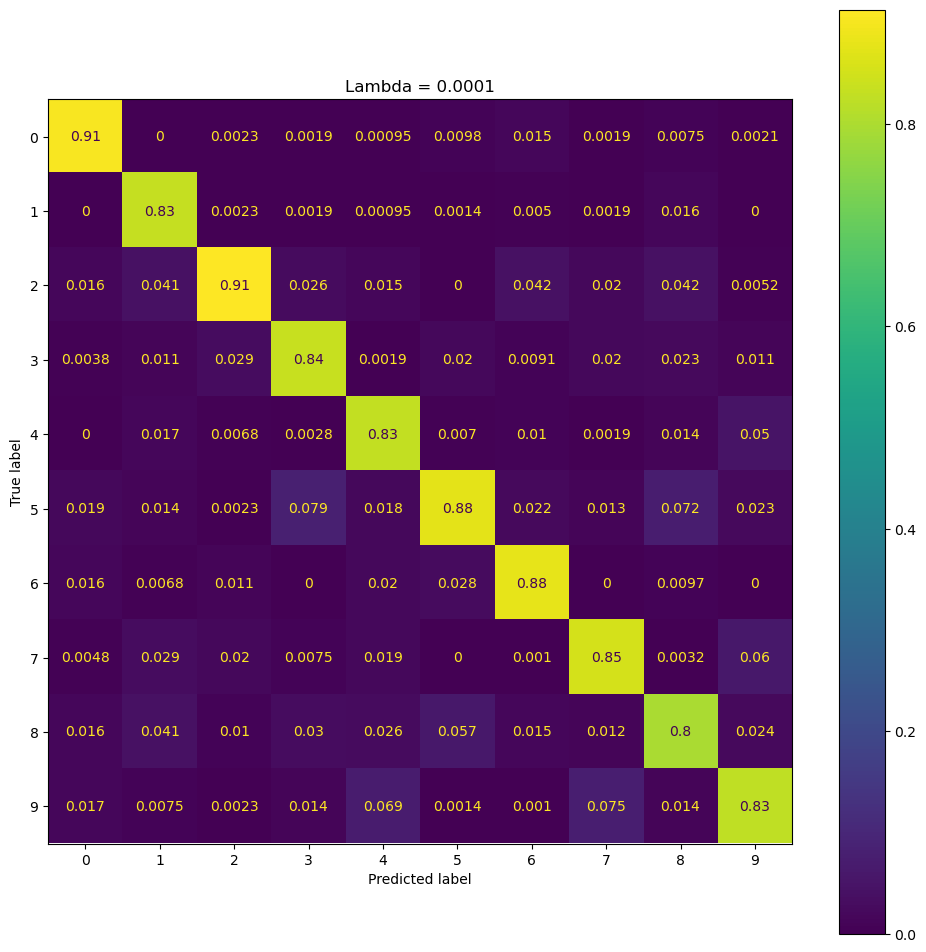

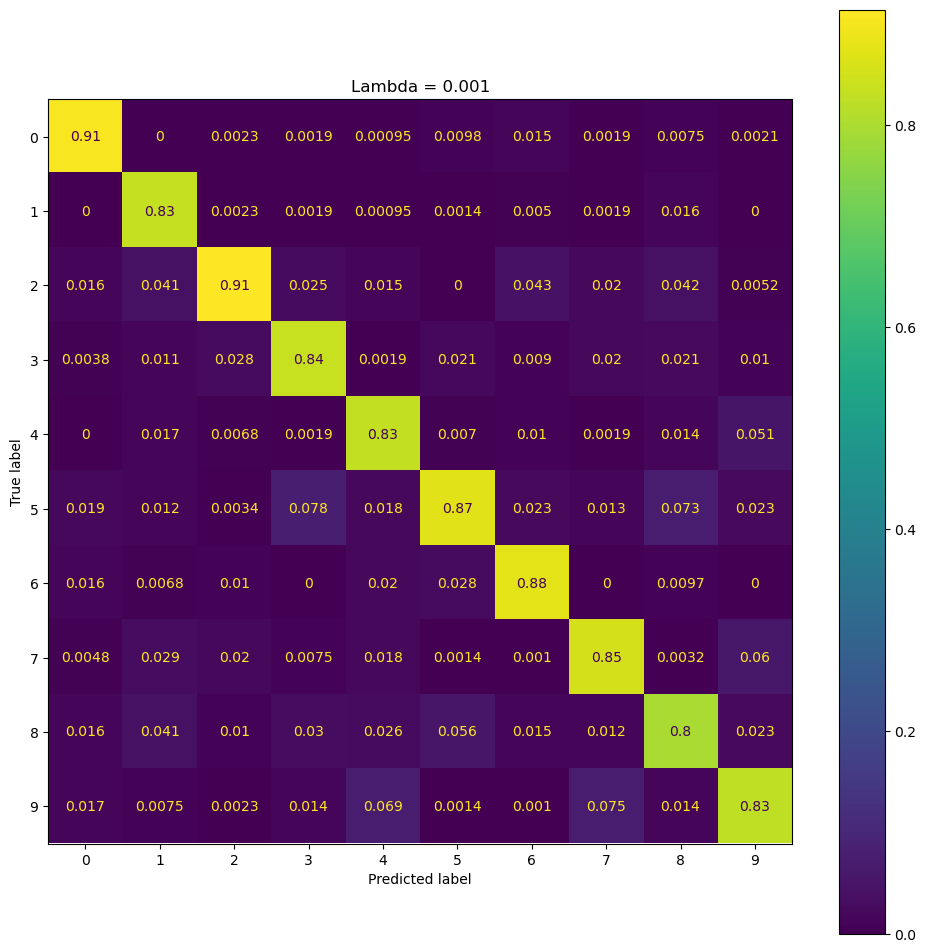

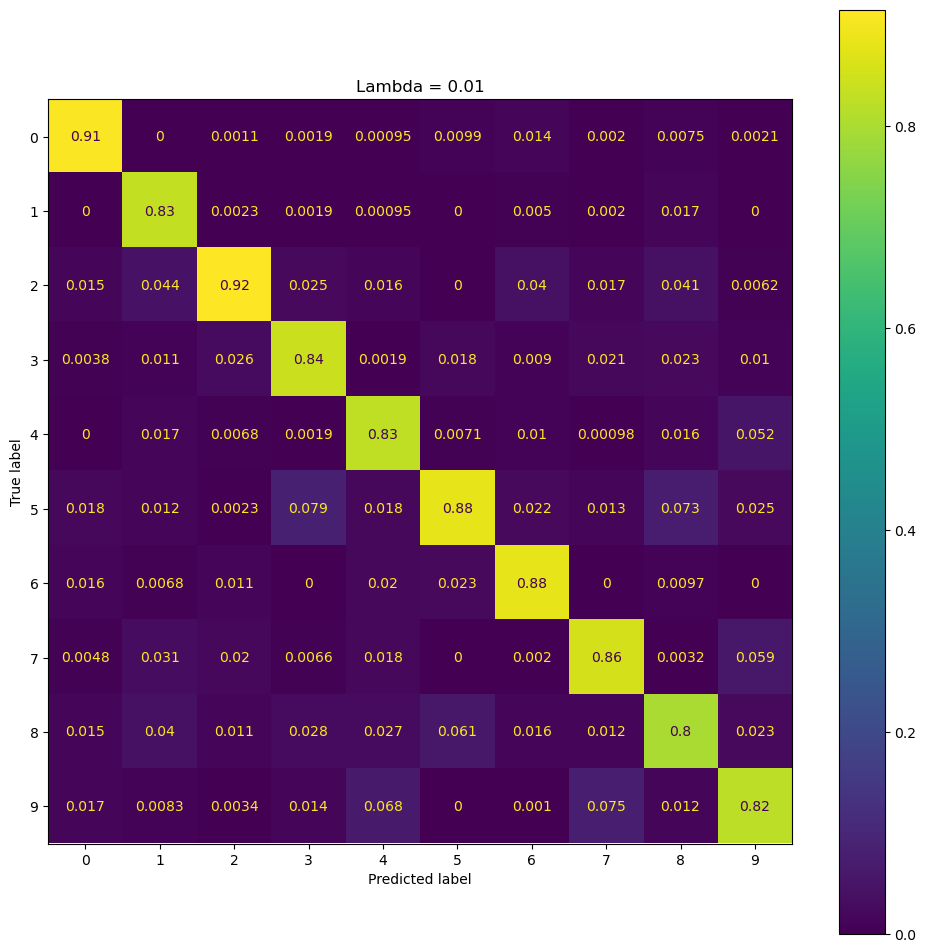

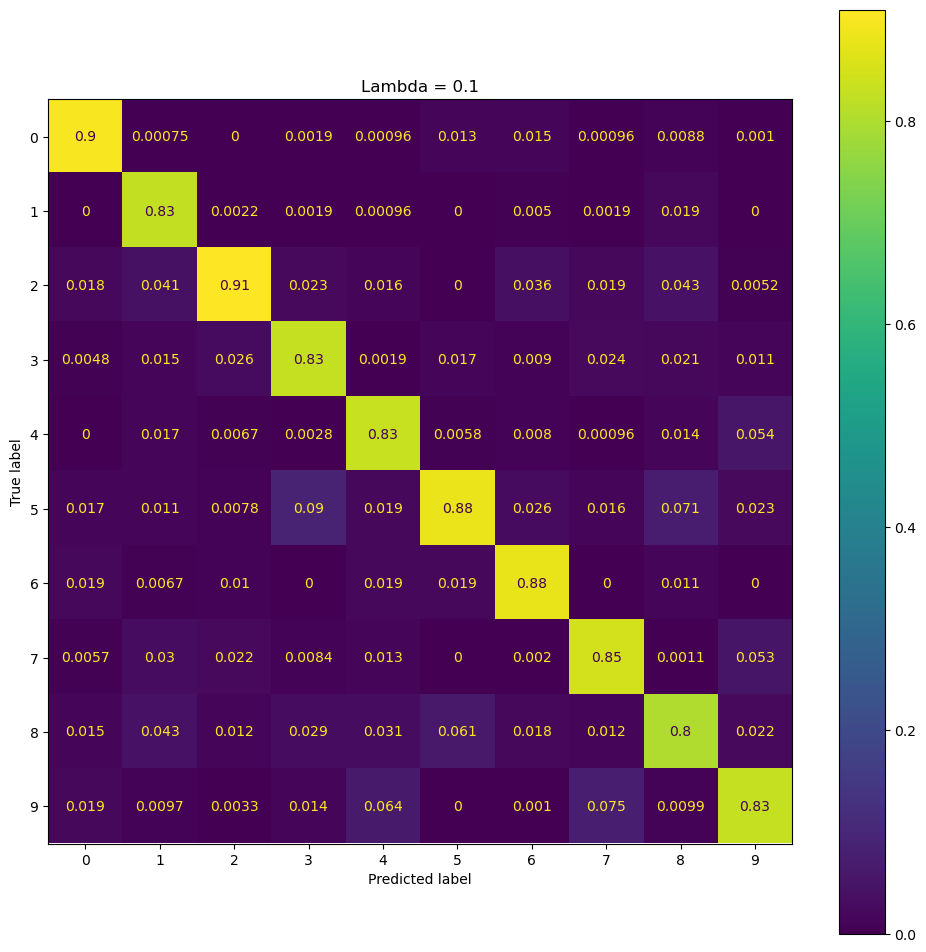

In [84]:
# Test data: model lamda=0
for model_ind, lam in enumerate(lam_array):
    true_pos = np.zeros((num_labels,1))
    total_tests = 0
    model_coef = clf_array[model_ind].coef_

    pred = test_A@model_coef.T
    
    conf_pred = np.argmax(pred, axis=1)
    conf_mat = confusion_matrix(test_label, conf_pred, normalize='pred')
    disp = ConfusionMatrixDisplay(conf_mat)
    disp.plot()
    plt.title(f"Lambda = {lam}")
    plt.show()
    


In [ ]:
# Take best model and compress

model_num = 2
best_model = clf_array[model_num].coef_

def compress_model(coef,threshold):
    # compress model by zeroing all coefficients below threshold, where threshold is defined as the percentage of the max coef
    threshold_val = coef.max()*threshold
    comp_coef = copy.deepcopy(coef)
    comp_coef[np.abs(comp_coef) < threshold_val] = 0
    return comp_coef

model_0p5 = compress_model(best_model, 0.5)




